In [85]:
# importing libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [86]:
# reading the dataset using pandas 
uber_df= pd.read_csv("uber-raw-data-sep14.csv")

In [87]:
# displaying the first 5 rows
uber_df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [88]:
# displaying the last 5 rows
uber_df.tail(5)

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [89]:
# dimensions of the dataset
# 1028136 rows and 4 columns
uber_df.shape

(1028136, 4)

In [90]:
# properties of the dataset
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [75]:
# Let's take a look at the Date/Time column
# the datatype is "object"
uber_df['Date/Time']

0            9/1/2014 0:01:00
1            9/1/2014 0:01:00
2            9/1/2014 0:03:00
3            9/1/2014 0:06:00
4            9/1/2014 0:11:00
                  ...        
1028131    9/30/2014 22:57:00
1028132    9/30/2014 22:57:00
1028133    9/30/2014 22:58:00
1028134    9/30/2014 22:58:00
1028135    9/30/2014 22:58:00
Name: Date/Time, Length: 1028136, dtype: object

In [91]:
#Changing the "Date/Time" column's data type to datetime
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

In [93]:
# the data type of the 'Date/Time' column has been changed
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


Breaking down the Date/Time column into "day", "hour" and "weekday" columns.
Let's first understand how we can extract these values from a single variable before 
creating columns for these variables

In [94]:
# displays the first value in the Date/Time column
uber_df["Date/Time"][0]

Timestamp('2014-09-01 00:01:00')

In [95]:
# displays the day from the first value in the Date/Time column
# '.day' extracts the day value from a variable of "datetime" data type
uber_df["Date/Time"][0].day

1

In [96]:
# displays the hour from the first value in the Date/Time column
# '.hour' extracts the hour value from a variable of "datetime" data type
# in this case, the value is 0 (00:01:00)
# time format is hh:mm:ss
uber_df["Date/Time"][0].hour

0

In [97]:
# displays the weekday from the first value in the Date/Time column
# '.weekday()' extracts the weekday value from a variable of "datetime" date type
# in this case, 0 means Monday
uber_df["Date/Time"][0].weekday()

0

In [98]:
# creating separate columns for 'Day', 'Hour' and 'Weekday'
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


Text(0, 0.5, 'Density of rides')

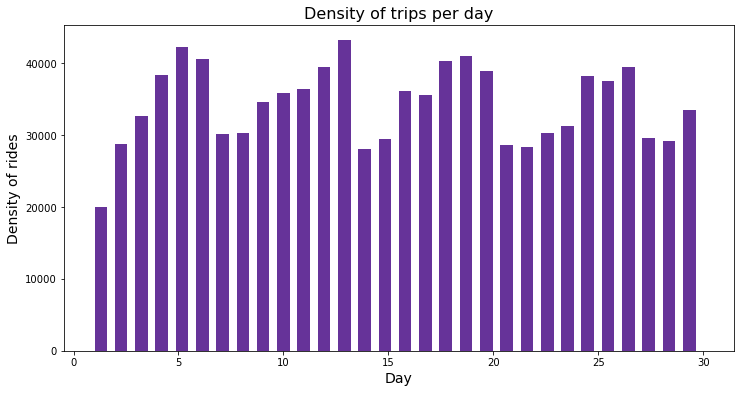

In [99]:
#Visualize the number of rides per day in the month of September
fig,ax = plt.subplots(figsize = (12,6))
# bins = 30 because there are 30 days in September
plt.hist(uber_df.Day, width= 0.6, bins= 30, color="rebeccapurple")
plt.title("Density of trips per day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

Text(0, 0.5, 'Density of rides')

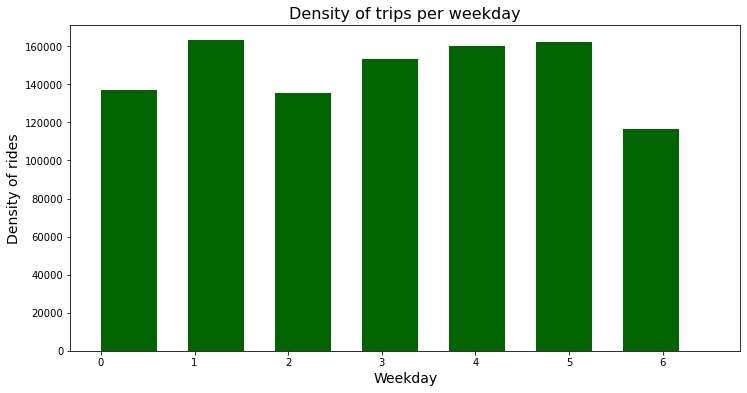

In [100]:
# Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
# range - lower and upper range of the bins
plt.hist(uber_df.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "darkgreen")
plt.title("Density of trips per weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

From the graph, it is evident that Monday is a very busy day, the count dips during the weekend. 

Text(0, 0.5, 'Density of rides')

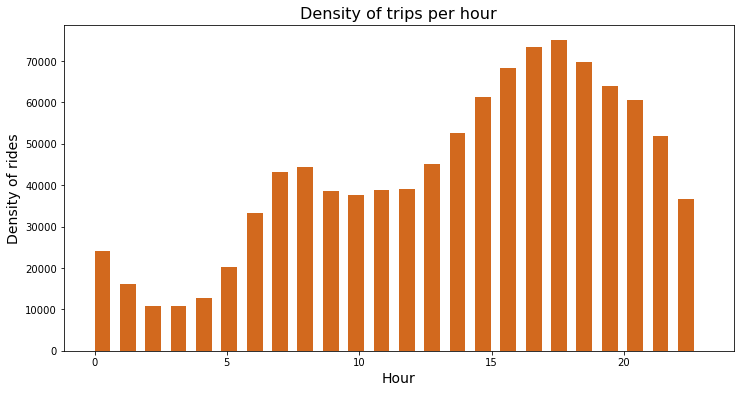

In [53]:
# Density of rides per hour
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Hour, width= 0.6, bins=24, color= "chocolate")
plt.title("Density of trips per hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

There's not much activity during the night hours (12:00 AM to 5:00 AM). There is a slight peak between 5-9 AM, some people probably catch an Uber to work during this time on weekdays. But it's still not the largest peak in the graph, most people tend to make use of their own cars or public transportation to get to the workplace. Uber rides can be expensive. 

From 1:00 PM onwards, the count starts steadly increasing. 6:00PM seems to be the busiest hour, people could be commuting from work back to their homes on weekdays. Another reason could be weekend evening plans, most people catch an uber to clubs or restaurants to wind down and relax with their friends during the weekend.From 6:00-11:00 PM, we can see a decline. 

In [101]:
# the longitude and latitude values together from the dataset can give us coordinates for locations in NYC
# longitude value for the first record in NYC
uber_df.Lon[0]

-74.0021

In [102]:
# latitude value for the first record in NYC
uber_df.Lat[0]

40.2201

Text(0, 0.5, 'Latitude')

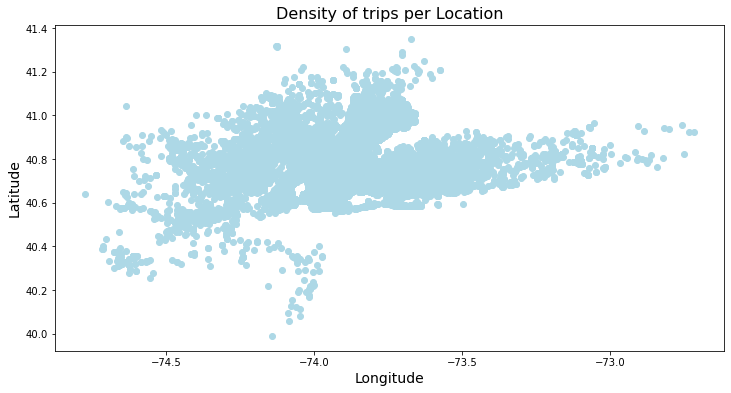

In [64]:
#Visualizing the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_df.Lon
y= uber_df.Lat
plt.scatter(x, y, color= "lightblue")
plt.title("Density of trips per Location", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

Coordinates of Manhattan: 40.7831° N, 73.9712° W
From the scatter plot, it's evident that the density of rides is high in Manhattan. 

The region with the lowest density seems to be near New Jersey. 

Coordinates of New Jersey: 40.0583° N, 74.4057° W